## Outliers practical implemention 

### What is an outlier?
An outlier is a data point that is distant from all other observation. A data-point that lies outside the
overall distribution of the data 

### Why outlier analysis?
Most data mining methods discard outliers noise or exceptions, however, in some applications such as fraud detection, the rare events can be more interesting than the more regularly occurring one and hence, the outlier analysis becomes important in such case.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

### How to identify an outlier
1. Z-score technique - z-score says in what standard devaition the data point falls in. Anything that falls away from
                      the 3rd standard deviation then it is an outlier
2. Interquartile range technique - Interquartile range is the range between 25 %ile and 75 %ile 


(little bit about percentile 
1. first the data is sorted 
2. Then it is calculated how many data points are behind the considered data points.)

### Reason for an outlier to be present in a dataset 
1. Variability in a data 
2. An experimental measurement error might have occured 


### Problems with outliers 
The outliers changes the mean and standard deviation of the data a lot and disrupts the statistical analysis.

### Ways of Finding the Outliers 
1. Box plot
2. Z-score 
3. interquartile range


## Detecting outlier with the help of Z-score 


In [2]:
Data = [ 1, 4, 6, 9,300, 11, 15, 18, 19, 21, 200, 25, 27 ,29]

In [3]:
outliers = []
def z_score(data):
    thresold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thresold):
            outliers.append(i)
    return outliers

In [4]:
outlier = z_score(Data)
print(outlier)

[]


## Interquartile range

### Steps 
1. Arrange the data in ascending order 
2. Calculate first quartile q1 and third quartile q3
3. Find quartile range (q3-q1)
4. Find Lower bound(q1*1.5) and upper bound(q3*1.5)
Anything that lies outside the range is a outlier

In [5]:
Data = sorted(Data)
q1,q3 = np.percentile(Data,[25,75])


In [7]:
print(q1,q3)

9.5 26.5


In [10]:
iqr = q3 - q1 
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
print(iqr)
print(lower_bound)
print(upper_bound )

17.0
-16.0
52.0


In [11]:
outlier = []
def iqr(data):
    for i in data:
        if (i< lower_bound or i> upper_bound):
            outlier.append(i)
    return outlier
            

In [12]:
iqr(Data)

[200, 300]

## Another way to find out outliers 
- Using box plot 

In [1]:
import seaborn as sns 

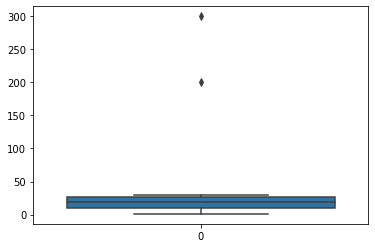

In [4]:
sns.boxplot(data = Data)

Clearly here the the two values are the outlier.The box shows the quartiles of the
dataset while the whiskers(lines extending vertically from the boxes) extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.

### Till now what we have done is univariate outlier analysis, now we would move to multivariate 
Can we do the multivariate analysis with Box plot? Well it depends, if you have a categorical values then you can use that with any continuous variable and do multivariate outlier analysis.